In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\COVID India.xlsx')
data.shape

(59, 2)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Day,Active Cases
0,2020-01-31,1
1,2020-02-01,1
2,2020-02-02,2
3,2020-02-03,3
4,2020-02-04,3


In [5]:
df.describe()

,Active Cases
count,59.000000
mean,122.067797
std,228.116264
min,1.000000
25%,3.000000
50%,3.000000
75%,105.000000
max,902.000000


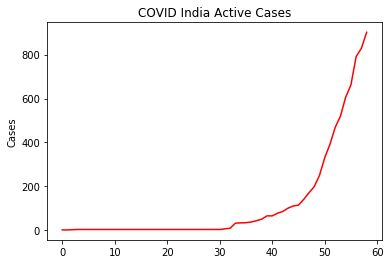

In [6]:
plt.plot(df.index, df['Active Cases'], 'r')
plt.title('COVID India Active Cases')
plt.ylabel('Cases');
plt.show()

In [7]:
df = df.set_index('Day')
df.index

DatetimeIndex(['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
      

In [8]:
y = df['Active Cases']

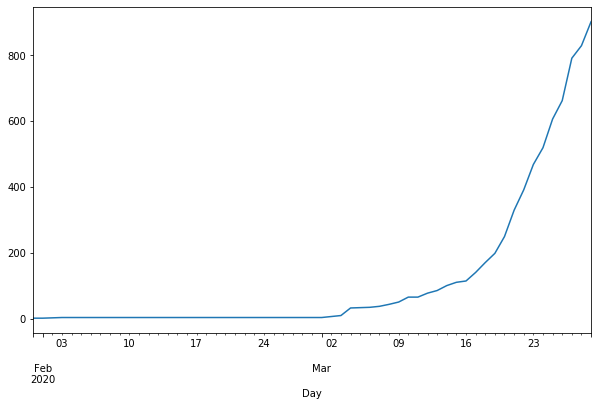

In [9]:
y.plot(figsize=(10, 6))
plt.show()

In [10]:
df.head()

,Active Cases
Day,
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
2020-02-04,3


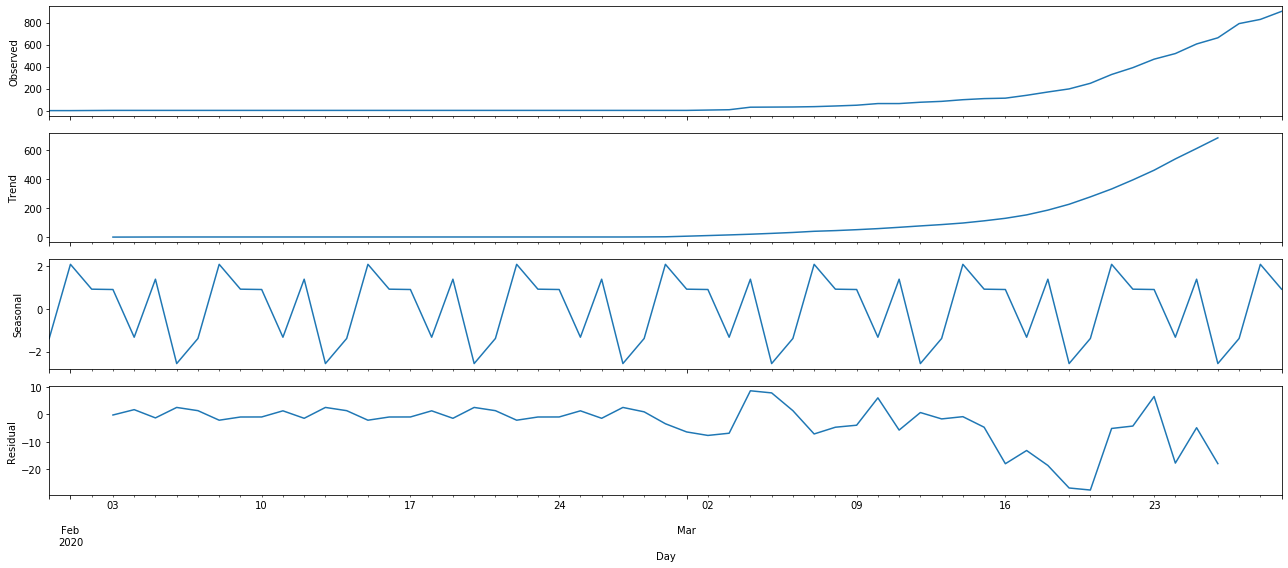

In [11]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:811.2869485238391
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:653.0783985451199
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:639.8961599824564
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1668.6224270515713
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:474.9272673135137
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:466.52281525388565
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:387.05984495524746
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1451.7771007140293
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:734.1722276326915
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:590.2188138235518
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:577.4551519250994
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:463.7809303248037
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:447.3001567931304
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:375.7613361184247
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1688.3302561329015
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:559.7298932206567
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:452.6547454049295
ARIMA(0, 1, 0)x(0, 

In [13]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0482      0.040     25.913      0.000       0.969       1.127
ma.L1         -1.3475      0.304     -4.428      0.000      -1.944      -0.751
ar.S.L12      -0.0062      0.313     -0.020      0.984      -0.619       0.606
sigma2       234.5073    108.921      2.153      0.031      21.026     447.989


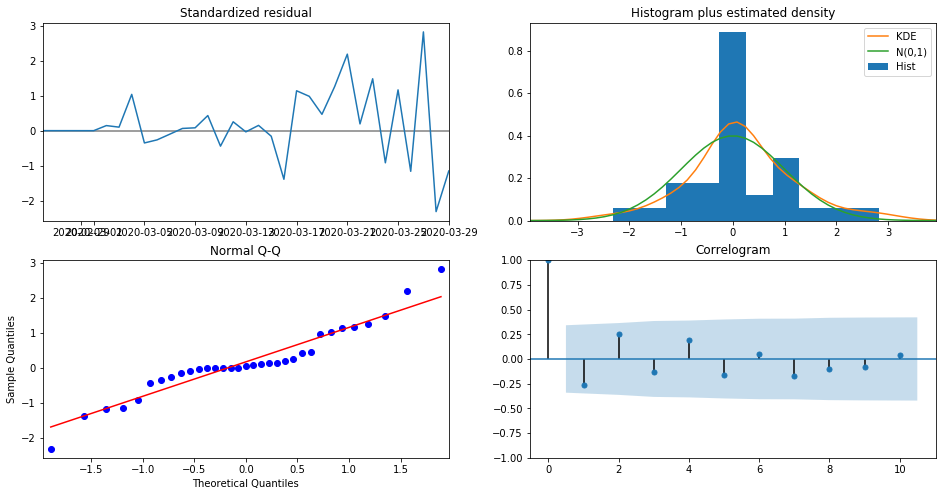

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

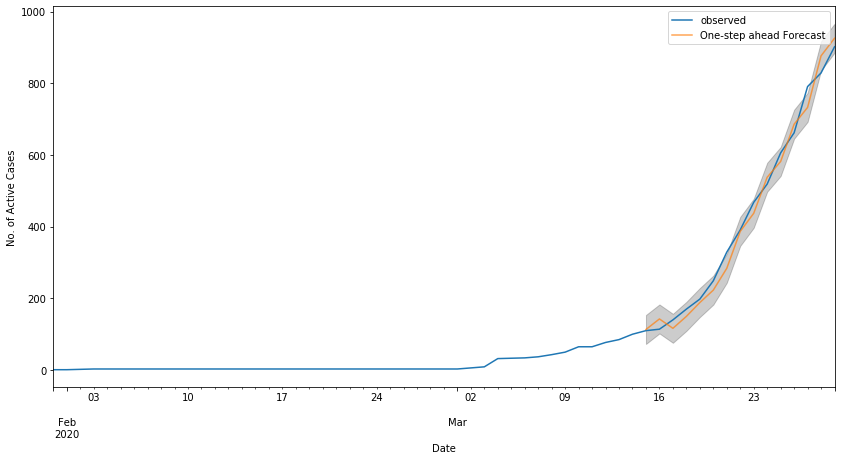

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2020-03-15'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of Active Cases')
plt.legend()
plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 885.8
The Root Mean Squared Error of our forecasts is 29.76


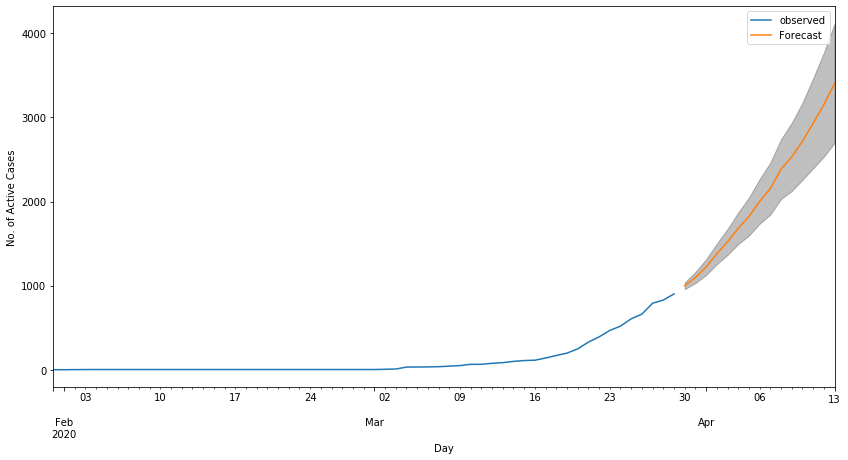

In [17]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Day')
ax.set_ylabel('No. of Active Cases')
plt.legend()
plt.show()